# MOwNiT
## Laboratorium 2
### Analiza danych - DataFrames

- Zaawansowany pakiet do działania na tabelkach nxm danych 
- Podobne do pandas DataFrames w Pythonie albo data.frame w R
- Specjalistyczne funkcje do statystyki
- W przypadku włąsnej instalacji należy zaistalować pakiet:

```julia
Pkg.add("DataFrames")
```

- DataFrame to rodzaj bazy danych in-memory
- Składa się z kolumn, do których odwołujemy się używając symboli
- Każda z kolumn może przechowywać inny typ (inaczej niż w dwuwymiarowych tablicach )
- od wersji 0.11 każda z kolumn jest typu Array{T,1} gdzie T jest okreslonym typem danych (np. Float64)
- strona pakietu: https://github.com/JuliaStats/DataFrames.jl
- dokumentacja najnowszej wersji: https://juliadata.github.io/DataFrames.jl/stable/index.html





In [ ]:
# za pierwszym razem instalujemy
#using Pkg
#Pkg.add("DataFrames")

In [1]:
# Tworzenie DataFrame
using DataFrames
df1=DataFrame()
df1.MojaKolumna= 1:4
df1.x2= [4,pi,sqrt(2), 42]
df1.Col3= [true,false, true, false]
show(df1)

4×3 DataFrame
 Row │ MojaKolumna  x2        Col3  
     │ Int64        Float64   Bool  
─────┼──────────────────────────────
   1 │           1   4.0       true
   2 │           2   3.14159  false
   3 │           3   1.41421   true
   4 │           4  42.0      false

In [2]:
# ! - nie tworzy kopii, : - tworzy kopię
typeof(df1[!,2])

Array{Float64,1}

In [3]:
typeof(df1.Col3)

Array{Bool,1}

In [4]:
# możemy też utworzyć DataFrame używając konstruktora
df2=DataFrame(MojaKolumna=1:10, 
    Col2=[2,pi, sqrt(2), 3, 4,2,pi, sqrt(2), 3, 4], 
    Col3=[true,true,false,true,false,true,true,false,true,false])

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,1,2.0,1
2,2,3.14159,1
3,3,1.41421,0
4,4,3.0,1
5,5,4.0,0
6,6,2.0,1
7,7,3.14159,1
8,8,1.41421,0
9,9,3.0,1


In [5]:
# ilosc wierszy
size(df2, 1) 

10

In [6]:
#ilosc kolumn
size(df2, 2)

3

In [7]:
# można odwoływać się po indeksie
show(df2[:,2])

[2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0, 2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0]

In [8]:
# albo po symbolu kolumny
show(df2[!,:Col2])

[2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0, 2.0, 3.141592653589793, 1.4142135623730951, 3.0, 4.0]

In [9]:
# wiersze lub podzbiory wierszy i kolumn uzyskujemy poprzez operator (:). Wynikiem jest nowy DataFrame
show(df2[3,:])

DataFrameRow
 Row │ MojaKolumna  Col2     Col3  
     │ Int64        Float64  Bool  
─────┼─────────────────────────────
   3 │           3  1.41421  false

In [10]:
# drugi i trzeci wiersz
df2[2:3, :]

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,2,3.14159,1
2,3,1.41421,0


In [11]:
# druga kolumna drugiego i trzeciego wiersza
df2[2:3, :Col2]

2-element Array{Float64,1}:
 3.141592653589793
 1.4142135623730951

In [12]:
# druga i trzecia kolumna drugiego i trzeciego wiersza
df2[2:3,[:Col2, :Col3]]

,Col2,Col3
,Float64,Bool
1,3.14159,1
2,1.41421,0


In [13]:
# pierwsze sześć wierszy
DataFrames.first(df2,6)

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,1,2.0,1
2,2,3.14159,1
3,3,1.41421,0
4,4,3.0,1
5,5,4.0,0
6,6,2.0,1


In [14]:
# ostatnie sześć wierszy
DataFrames.last(df2,6)

,MojaKolumna,Col2,Col3
,Int64,Float64,Bool
1,5,4.0,0
2,6,2.0,1
3,7,3.14159,1
4,8,1.41421,0
5,9,3.0,1
6,10,4.0,0


In [15]:
# nazwy kolumn
names(df2)

3-element Array{String,1}:
 "MojaKolumna"
 "Col2"
 "Col3"

In [16]:
# typy kolumn
eltype.(eachcol(df2))

3-element Array{DataType,1}:
 Int64
 Float64
 Bool

In [17]:
# podstawowe dane statystyczne o wartościach w kolumnie
describe(df2)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,MojaKolumna,5.5,1,5.5,10,0,Int64
2,Col2,2.71116,1.41421,3.0,4.0,0,Float64
3,Col3,0.6,0,1.0,1,0,Bool


In [18]:
using Statistics
mean(df2.Col2)

2.711161243192578

In [19]:
var(df2.Col2)

0.9150284373648316

In [20]:
#Pkg.add("CSV")
using CSV
input="winequality.csv"
mydata=CSV.read(input, delim=";",DataFrame)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide
,Float64,Float64,Float64,Float64,Float64,Float64
1,7.4,0.7,0.0,1.9,0.076,11.0
2,7.8,0.88,0.0,2.6,0.098,25.0
3,7.8,0.76,0.04,2.3,0.092,15.0
4,11.2,0.28,0.56,1.9,0.075,17.0
5,7.4,0.7,0.0,1.9,0.076,11.0
6,7.4,0.66,0.0,1.8,0.075,13.0
7,7.9,0.6,0.06,1.6,0.069,15.0
8,7.3,0.65,0.0,1.2,0.065,15.0
9,7.8,0.58,0.02,2.0,0.073,9.0


In [21]:
describe(mydata)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,fixed acidity,8.31964,4.6,7.9,15.9,0,Float64
2,volatile acidity,0.527821,0.12,0.52,1.58,0,Float64
3,citric acid,0.270976,0.0,0.26,1.0,0,Float64
4,residual sugar,2.53881,0.9,2.2,15.5,0,Float64
5,chlorides,0.0874665,0.012,0.079,0.611,0,Float64
6,free sulfur dioxide,15.8749,1.0,14.0,72.0,0,Float64
7,total sulfur dioxide,46.4678,6.0,38.0,289.0,0,Float64
8,density,0.996747,0.99007,0.99675,1.00369,0,Float64
9,pH,3.31111,2.74,3.31,4.01,0,Float64


In [22]:
typeof(mydata)

DataFrame

In [23]:
size(mydata)

(1599, 12)

In [24]:
# Dzielenie DataFrame na podgrupy i działania na nich

# Split -Apply - Combine

#https://dataframes.juliadata.org/stable/man/split_apply_combine/

# rozdzielanie na podgrupy po jakości wina (quality)
# Split

wine_grouped=groupby(mydata, :quality)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide
,Float64,Float64,Float64,Float64,Float64,Float64
1,7.4,0.7,0.0,1.9,0.076,11.0
2,7.8,0.88,0.0,2.6,0.098,25.0
3,7.8,0.76,0.04,2.3,0.092,15.0
4,7.4,0.7,0.0,1.9,0.076,11.0
5,7.4,0.66,0.0,1.8,0.075,13.0
6,7.9,0.6,0.06,1.6,0.069,15.0
7,7.5,0.5,0.36,6.1,0.071,17.0
8,6.7,0.58,0.08,1.8,0.097,15.0
9,7.5,0.5,0.36,6.1,0.071,17.0


In [25]:

# podsumowanie ile jest win w każdej grupie 
combine(wine_grouped, nrow)

,quality,nrow
,Int64,Int64
1,5,681
2,6,638
3,7,199
4,4,53
5,8,18
6,3,10


In [26]:
combine(wine_grouped, "fixed acidity" => mean)

,quality,fixed acidity_mean
,Int64,Float64
1,5,8.16725
2,6,8.34718
3,7,8.87236
4,4,7.77925
5,8,8.56667
6,3,8.36


In [27]:
# zliczenie liczby win o danej jakości i zawartości alkoholu, posortowane
wine_grouped2=sort(combine(groupby(mydata, [:quality,:alcohol]),nrow=> :liczba), [:quality,:alcohol])

,quality,alcohol,liczba
,Int64,Float64,Int64
1,3,8.4,1
2,3,9.0,1
3,3,9.7,1
4,3,9.8,1
5,3,9.9,1
6,3,9.95,1
7,3,10.2,1
8,3,10.7,1
9,3,10.9,1


In [28]:
# zapis do pliku
CSV.write("dataframe1.csv", wine_grouped2)

"dataframe1.csv"


### Graficzna reprezentacja DataFrames




In [29]:
using DataFrames
df1 = DataFrame(a = 1:10, b = map(x->2x,(1:10)), c = map(x->log(x),(1:10)), d=rand(10), e=map(x->x%2,(1:10)))

,a,b,c,d,e
,Int64,Int64,Float64,Float64,Int64
1,1,2,0.0,0.831983,1
2,2,4,0.693147,0.993409,0
3,3,6,1.09861,0.0603823,1
4,4,8,1.38629,0.108731,0
5,5,10,1.60944,0.15822,1
6,6,12,1.79176,0.33262,0
7,7,14,1.94591,0.79868,1
8,8,16,2.07944,0.515415,0
9,9,18,2.19722,0.519215,1


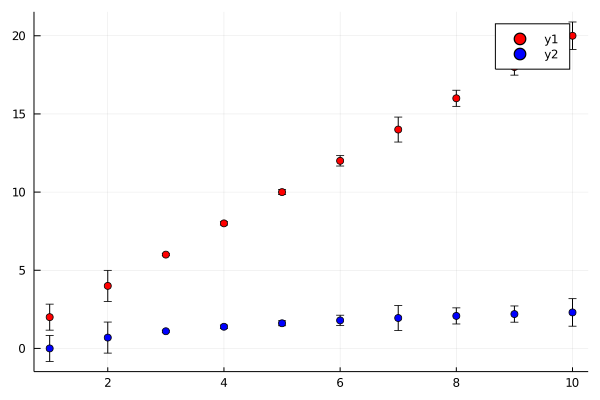

In [30]:
# Mozna odwolywac sie bezposrednio do kolumn w poniższy sposób (gdyz sa typu jednowymiarowych tablic 
# Array{T,1})

using Plots
scatter(df1.a, [df1.b, df1.c], colour = [:red :blue], yerr=df1.d)

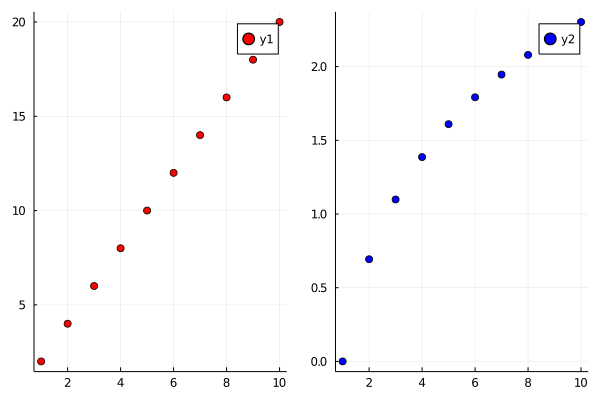

In [31]:
# użycie opcji layout
scatter(df1.a, [df1.b, df1.c],  colour = [:red :blue ], layout=2)

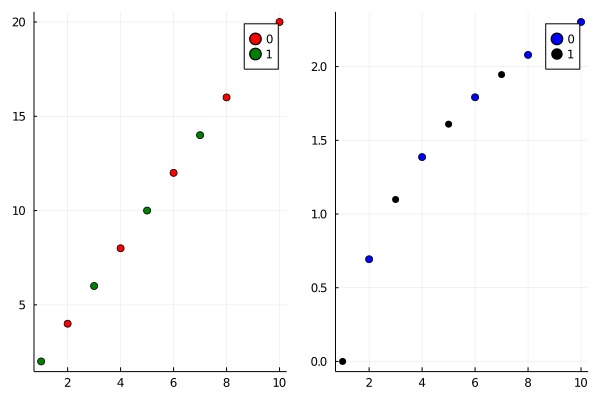

In [32]:
# użycie opcji layout i grup
scatter(df1.a, [df1.b, df1.c], group=df1.e,  colour = [:red :blue :green :black], layout=2)

### Zadanie 
- Napisać program w języku Julia do obliczania iloczynu skalarnego wektorów (<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.dot">LinearAlgebra.dot</a>) i mnożenia macierzy kwadratowej przez wektor z użyciem 
<a href="https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#Elementary-operations-1">operatora *</a>.
- Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów.  Dokonać 10 pomiarów dla każdego rozmiaru wektora.
- Czasy działania powinny  być zapisywane do <b>jednego</b> pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.
- Wczytać dane z w/w pliku do <b>jednego</b> DataFrame w języku Julia. 
- Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji w zależności od rozmiaru wektora. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego. 
- Proszę poukładac wykresy  w tabelkę za pomocą  opcji layouts: https://docs.juliaplots.org/latest/layouts/#Simple-Layouts-1.
- Należy zadbać o staranne podpisanie osi i wykresów.

### Funkcje

In [1]:
import LinearAlgebra
function dot(x,y)
    return LinearAlgebra.dot(x,y) #sum(ax*by for (ax,by) in zip(x,y))
end

dot (generic function with 1 method)

In [2]:
function matrix_vector(m,v)
    return m*v
end

matrix_vector (generic function with 1 method)

In [3]:
println(dot([1,2,3],[2,3,4]))
println(matrix_vector(rand(2,2),rand(2)))

20
[0.5746963642700728, 0.64918791162092]


### Testy 

In [32]:
using DataFrames
using Plots
df = DataFrame(funkcja="", wymiar=0, czas=0.0, numer_testu = 0)
df = df[setdiff(1:end, 1), :] # usuwam pusty pierwszy wiersz
for n in 1:50 # ile losowań wymiarów 
    i = rand(3:1000) # losowanie wymiaru
    for x in 1:10 # ile powtórzeń testu dla danego wymiaru
        m = rand(i,i) # losowe dane do testu
        v = rand(i)
        r = rand(i)
        push!(df, ("dot", i, @elapsed(dot(r, v)), n)) 
        push!(df, ("matrix_vector_mult", i, @elapsed(matrix_vector(m, v)), n+50))
    end
end


### Zapis do CSV

In [6]:
using CSV
CSV.write("df.csv", df)

"df.csv"

### Wczytywanie do DataFrame

In [7]:
#df2=CSV.read("df.csv", delim=",",DataFrame)

,funkcja,wymiar,czas,numer_testu
,String,Int64,Float64,Int64
1,dot,657,1.3e-6,1
2,matrix_vector_mult,657,0.0004457,51
3,dot,657,6.0e-7,1
4,matrix_vector_mult,657,0.0004114,51
5,dot,657,5.0e-7,1
6,matrix_vector_mult,657,0.000423101,51
7,dot,657,6.0e-7,1
8,matrix_vector_mult,657,0.000435599,51
9,dot,657,8.0e-7,1


### Średnia, odchylenie standardowe, wykresy

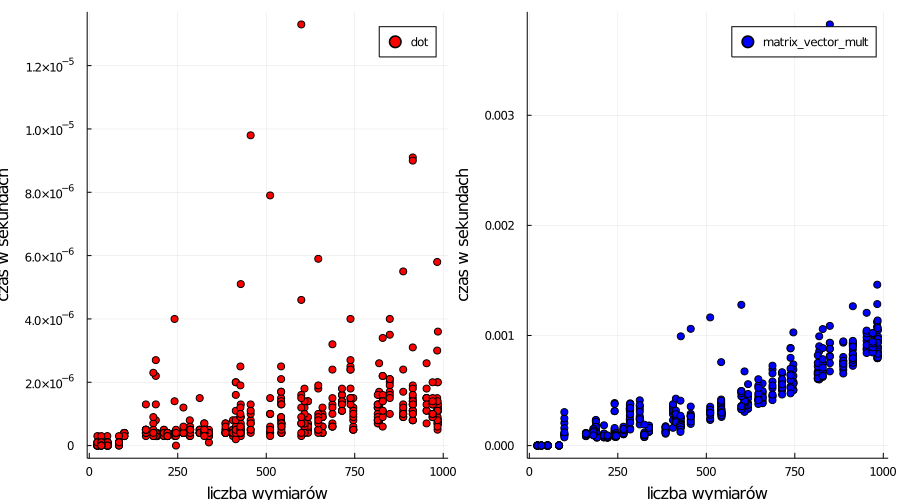

In [33]:
scatter([df.wymiar], [df.czas],group=df.funkcja,  colour = [:red :blue ]
    , layout=2, xlabel = "liczba wymiarów", ylabel = "czas w sekundach", size=(900, 500))

In [34]:
using Statistics
df_stat = DataFrame(funkcja="", wymiar=0, srednia = 0.0, odchyl_std = 0.0)
df_stat = df_stat[setdiff(1:end, 1), :] # usuwam pusty pierwszy wiersz

tmpdf = DataFrame(funkcja="", wymiar=0, srednia = 0.0, odchyl_std = 0.0)
tmpdf = tmpdf[setdiff(1:end, 1), :] # usuwam pusty pierwszy wiersz

for i in 1:100
    tmpdf = filter(row -> row.numer_testu == i, df) # wybranie tylko danych dla danego testu
    funkcja = tmpdf[1,1]
    wymiar = tmpdf[1,2]
    srednia = mean(tmpdf.czas)
    odchyl_std = sqrt(var(tmpdf.czas))
    push!(df_stat, (funkcja, wymiar, srednia, odchyl_std)) # zapisanie testów z ich średnią i odchyleniem std
end


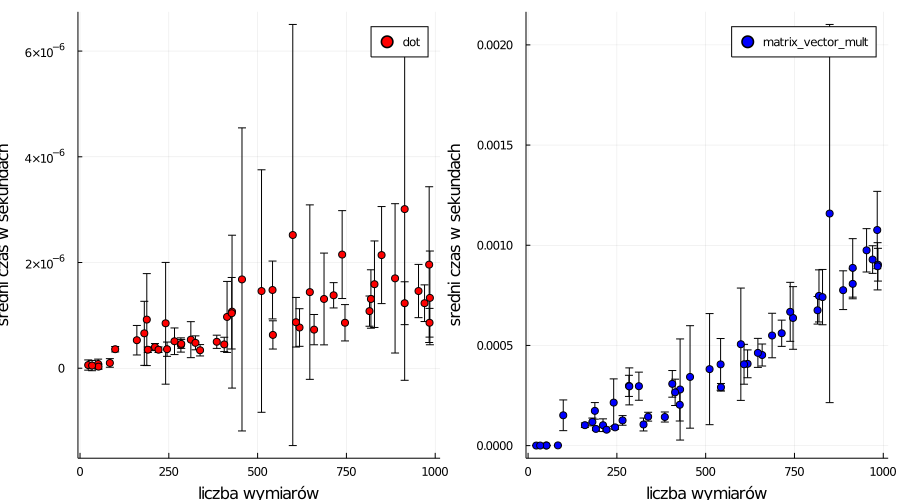